<a href="https://colab.research.google.com/github/jcmachicao/potato_research/blob/main/pp__papa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Precios Papa Investigación Modelo

In [1]:
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import os
from sklearn.linear_model import LinearRegression

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
#ruta = 'drive/My Drive/2020 Papers/2021 Papa Sostenible/'
ruta = 'drive/My Drive/00 Modelos Principales/modelo_papa_total_210804/'
print(os.listdir(ruta))
#archivo = 'data_papa.xlsx'
archivo = 'data_papa_1992_2021.xlsx'

['papasost__data2f.ipynb', 'data_papa_1992_2021.xlsx', 'data_X.csv', 'data_y.csv', 'curvas_precision_aprendizaje.png', 'modelo_3v_v0.pth', 'errors.xlsx', 'modelo_3v_v5_result.pth', 'preds (3).csv', 'modelos 2023', 'Screenshot 2023-02-02 191451.jpg', 'Screenshot 2023-02-02 191451.gdoc', 'data_rnn_X.pkl', 'data_rnn_y.pkl', 'pp__papa.ipynb']


## 0.1 Generales

In [15]:
data = pd.read_excel(ruta + archivo)

In [16]:
# Transformaciones inmediatas de data
data = data.dropna()
data = data.sort_values(by='year')
data['valor'] = data.volumen * data.precio

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21333 entries, 5107 to 2557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       21333 non-null  float64
 1   mes        21333 non-null  float64
 2   producto   21333 non-null  object 
 3   provincia  21333 non-null  object 
 4   volumen    21333 non-null  float64
 5   precio     21333 non-null  float64
 6   valor      21333 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


In [18]:
data.columns

Index(['year', 'mes', 'producto', 'provincia', 'volumen', 'precio', 'valor'], dtype='object')

In [20]:
lista = data[['provincia', 'valor']].groupby(by=['provincia']).sum()
lista = pd.DataFrame(lista['valor'].sort_values(ascending=False))
lista.to_excel(ruta + 'lista_provincias.xlsx')

In [21]:
lista.valor[0:20]

provincia
Huanuco                    1.960775e+06
Huamanga                   1.026134e+06
Huancayo                   9.884414e+05
Tarma                      5.858969e+05
Ambo                       5.507842e+05
Pasco                      5.187838e+05
Jauja                      4.588733e+05
Barranca                   4.561237e+05
Huaral                     4.039059e+05
Ica                        3.602197e+05
Nazca                      3.202457e+05
Arequipa                   3.084198e+05
Andahuaylas                3.021730e+05
Canete                     2.199754e+05
Huaura                     1.376588e+05
Lima                       9.196012e+04
Huancavelica               8.912434e+04
Tayacaja                   7.277189e+04
Junin                      6.802733e+04
Procedencia Desconocida    5.779980e+04
Name: valor, dtype: float64

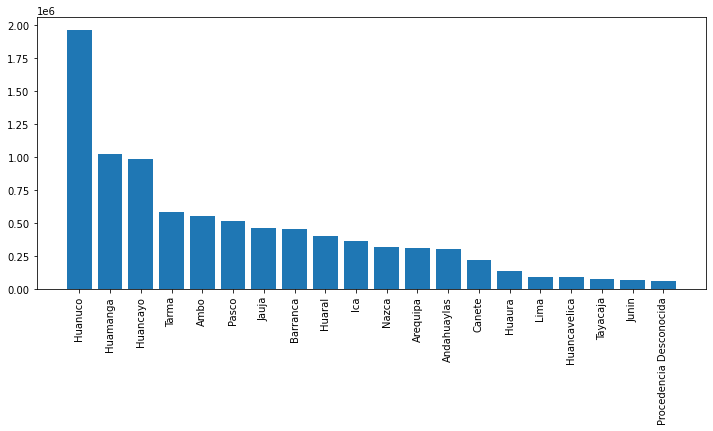

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(12,5))
plt.bar(lista.index[0:20], lista.valor[0:20])
plt.xticks(rotation=90)
plt.show()
plt.savefig(ruta + 'prov20top.png')

In [24]:
data100 = data[data.producto == 'Papa Blanca']
data100 = data100[data100.provincia.isin(lista.index[0:20])]
data100 = data100.drop(['producto'], axis=1)
data100.shape

(5011, 6)

## 0.2 Exploración

In [25]:
for it in data100.columns:
  print(it)
  print(data100[it].unique())

year
[1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008.
 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020.
 2021.]
mes
[ 4.  3. 12.  2.  1.  8. 10.  5.  6. 11.  7.  9.]
provincia
['Canete' 'Ambo' 'Pasco' 'Barranca' 'Huancavelica' 'Huanuco' 'Huancayo'
 'Jauja' 'Procedencia Desconocida' 'Huamanga' 'Junin' 'Huaura'
 'Andahuaylas' 'Tarma' 'Tayacaja' 'Arequipa' 'Huaral' 'Ica' 'Nazca' 'Lima']
volumen
[  12.     30.36 4005.13 ... 1308.   2656.   1927.  ]
precio
[0.46 0.4  0.65 0.47 0.56 0.78 0.61 0.75 0.68 0.74 1.54 0.53 1.05 1.42
 1.08 0.79 0.66 0.48 0.93 0.58 0.62 0.33 0.37 0.55 0.54 0.43 0.39 0.38
 0.31 0.67 0.71 0.36 0.6  0.49 0.52 0.34 0.69 0.45 0.32 0.3  0.35 0.63
 0.72 0.76 0.51 0.64 0.57 0.59 0.44 0.84 0.73 0.81 0.7  0.42 0.5  0.95
 0.77 1.06 0.97 0.92 1.02 0.8  0.82 0.89 0.86 0.88 1.23 1.31 1.21 1.82
 1.03 1.7  1.2  1.15 1.12 1.19 1.61 1.78 1.16 0.91 2.09 1.52 1.4  1.01
 0.83 1.   1.47 1.26 1.13 1.36 1.17 1.49]
valor
[   5.52     13.9656 16

<AxesSubplot:>

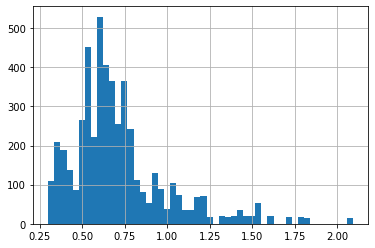

In [26]:
data100.precio.hist(bins=50)

In [27]:
xlab, ylab, flab = 'mes', 'precio', 'provincia'

fig = px.bar(data100, x=xlab, y=ylab, 
            #color=clab, 
            facet_col=flab,
            #animation_frame='year', 
            #animation_group='provincia',
            width=3200, height=300,
            )
fig.show()

In [29]:
data100.to_excel(ruta + 'papa_out_data100.xlsx')

## Generación de dummies

In [37]:
import pandas as pd
data100 = pd.read_excel(ruta + 'papa_out_data100.xlsx')

In [38]:
data100.columns

Index(['Unnamed: 0', 'year', 'mes', 'provincia', 'volumen', 'precio', 'valor'], dtype='object')

In [39]:
data_dum = pd.get_dummies(data100.drop('Unnamed: 0', axis=1), columns=['mes', 'provincia'])

In [40]:
data_dum.shape

(5011, 36)

In [41]:
data_dum.columns

Index(['year', 'volumen', 'precio', 'valor', 'mes_1', 'mes_2', 'mes_3',
       'mes_4', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10',
       'mes_11', 'mes_12', 'provincia_Ambo', 'provincia_Andahuaylas',
       'provincia_Arequipa', 'provincia_Barranca', 'provincia_Canete',
       'provincia_Huamanga', 'provincia_Huancavelica', 'provincia_Huancayo',
       'provincia_Huanuco', 'provincia_Huaral', 'provincia_Huaura',
       'provincia_Ica', 'provincia_Jauja', 'provincia_Junin', 'provincia_Lima',
       'provincia_Nazca', 'provincia_Pasco',
       'provincia_Procedencia Desconocida', 'provincia_Tarma',
       'provincia_Tayacaja'],
      dtype='object')

## 1.0 Definición de dataset de modelamiento

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [60]:
data_X = data_dum.drop(['precio'], axis=1)
X = np.array(data_X)
scaler.fit(X)
X = scaler.transform(X)
X.shape

(5011, 35)

In [61]:
y = np.array(data_dum.precio).reshape(-1,1)
scaler.fit(y)
y = scaler.transform(y)
y.shape

(5011, 1)

## 1.1 Elaboración de Modelo de Regresión Lineal (Aproximativo)

In [62]:
lm = LinearRegression()
lm.fit(X, y)
y_hat = lm.predict(X)
y_hat.shape

(5011, 1)

In [63]:
X.shape

(5011, 35)

In [64]:
lm.coef_.reshape(-1,1).shape
data_X.columns.shape

(35,)

In [65]:
data_X.columns

Index(['year', 'volumen', 'valor', 'mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5',
       'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10', 'mes_11', 'mes_12',
       'provincia_Ambo', 'provincia_Andahuaylas', 'provincia_Arequipa',
       'provincia_Barranca', 'provincia_Canete', 'provincia_Huamanga',
       'provincia_Huancavelica', 'provincia_Huancayo', 'provincia_Huanuco',
       'provincia_Huaral', 'provincia_Huaura', 'provincia_Ica',
       'provincia_Jauja', 'provincia_Junin', 'provincia_Lima',
       'provincia_Nazca', 'provincia_Pasco',
       'provincia_Procedencia Desconocida', 'provincia_Tarma',
       'provincia_Tayacaja'],
      dtype='object')

In [66]:
len(list(lm.coef_[0]))

35

In [ ]:
coefs = pd.DataFrame()
coefs['lab'] = data_X.columns
coefs['coef'] = lm.coef_.reshape(-1,1)
coefs = coefs.sort_values(by='coef', ascending=False)
coefs

In [69]:
coefs.to_excel(ruta + 'coeficientes.xlsx')

In [70]:
data100['y_orig'] = y
data100['y_hat'] = y_hat

In [71]:
data100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5011 non-null   int64  
 1   year        5011 non-null   int64  
 2   mes         5011 non-null   int64  
 3   provincia   5011 non-null   object 
 4   volumen     5011 non-null   float64
 5   precio      5011 non-null   float64
 6   valor       5011 non-null   float64
 7   y_orig      5011 non-null   float64
 8   y_hat       5011 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 352.5+ KB


In [72]:
xlab = 'y_orig'
ylab = 'y_hat'
clab = 'year'

fig = px.scatter(data100, x=xlab, y=ylab, 
                 color=clab, 
                 #facet_row=flab,
                 #animation_frame=clab, 
                 #animation_group='producto',
                 width=600, height=600,)
fig.show()

## Modelo NN

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import torch
import torch.nn as nn

In [74]:
X_np = X.astype(np.float64)
y_np = y.astype(np.float32)
X_tn = torch.from_numpy(X_np)
y_tn = torch.from_numpy(y_np.reshape(-1, 1))
X_tn.shape, y_tn.shape

(torch.Size([5011, 35]), torch.Size([5011, 1]))

In [ ]:
np.save('X_np.np', X_npy)
np.save('y_np.np', y_npy)

In [75]:
model = nn.Sequential(
  nn.Linear(35, 512),
  nn.ReLU(),
  nn.Linear(512, 128),
  nn.ReLU(),
  nn.Linear(128, 32),
  nn.ReLU(),
  nn.Linear(32, 4),
  nn.ReLU(),
  nn.Linear(4, 1),
)

In [76]:
optimizador = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0)
criterio = torch.nn.MSELoss()

In [77]:
torch.cuda.device_count(), torch.cuda.get_device_name(0)

(1, 'Tesla T4')

In [78]:
model.cuda()
X_g = X_tn.float().cuda()
y_g = y_tn.cuda()

In [79]:
X_g.shape, y_g.shape

(torch.Size([5011, 35]), torch.Size([5011, 1]))

In [117]:
errores = []
preds = []
nit = -1
EPOCS = 1000000

In [122]:
nit += 1
for epo in range(EPOCS):
  optimizador.zero_grad()
  y_pred = model(X_g)
  loss = criterio(y_pred, y_g)
  loss.backward()
  optimizador.step()
  if epo % int(EPOCS/10) == 0:
    print(epo, loss.item())
    errores.append([epo+nit*EPOCS, loss.item()])
    pred = y_pred.cpu().detach().numpy()
    preds.append(pred)

0 0.005035742186009884
100000 0.004594115074723959
200000 0.004216629546135664
300000 0.0038846065290272236
400000 0.003594957524910569
500000 0.003334957407787442
600000 0.003111111931502819
700000 0.002913382602855563
800000 0.00273585831746459
900000 0.002568604424595833


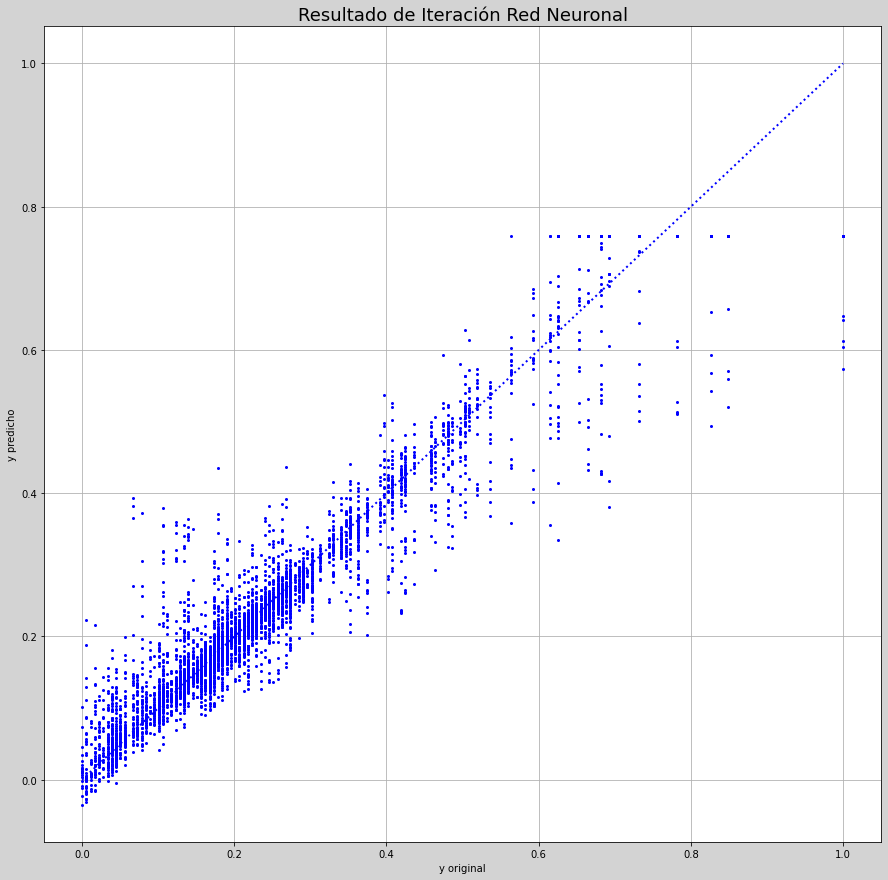

In [123]:
#@title Gráfica
f = plt.figure(figsize=(15,15), facecolor='lightgray')

ax1 = f.add_subplot(111)
ax1.plot(y_np, pred, 'bo', ms=2, label='Red Neuronal')
ax1.plot([0,1], [0, 1], 'b:', lw=2)
ax1.set_title('Resultado de Iteración Red Neuronal', fontsize=18)
plt.xlabel('y original')
plt.ylabel('y predicho')
plt.grid(True)
plt.savefig('alineamiento2.jpg')
plt.show()

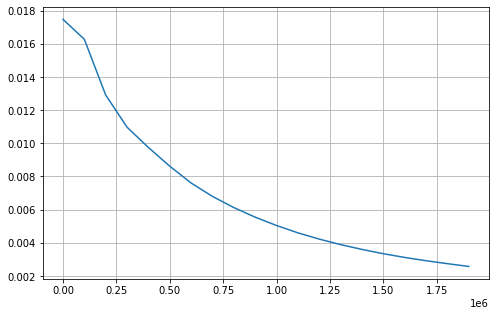

<Figure size 432x288 with 0 Axes>

In [124]:
#@title Curva de Aprendizaje
err_df = pd.DataFrame(errores)
plt.figure(figsize=(8,5), facecolor='white')
plt.plot(err_df[0], err_df[1])
#plt.yscale('log')
plt.grid(True)
plt.show()
plt.savefig('curva_aprend2.jpg')

In [125]:
torch.save(model.state_dict(), ruta+'modelo_2023_02.pth')